# Project FMT #

• DOMAIN: Semiconductor manufacturing process

• CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of 
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. 
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and trying out different combinations of features, essential signals that are impacting the yield type can be identified.

 DATA DESCRIPTION: sensor-data.csv : (1567, 592)
The data consists of 1567 datapoints each with 591 features. 
The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.


• PROJECT OBJECTIVE: We will build a classifier to predict the Pass/Fail yield of a particular process entity and analyse whether all the  features are required to build the model or not.



In [1]:
# Load the Libraries
import numpy  as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

class color:
   BOLD = '\033[1m'
   END = '\033[0m'

*1 Import and understand the data*

***Q 1A Import ‘signal-data.csv’ as DataFrame***

***Ans 1A***

In [2]:
# Load the signals csv file into a dataframe
signals_df = pd.read_csv( 'FMT_Project/signal_data.csv' )


***Q . 1B. Print 5 point summary and share at least 2 observations***

***Ans 1B.***

In [3]:
# use describe method to display 5 point summary
signals_df.describe()

0            1            2            3            4  \
count  1561.000000  1560.000000  1553.000000  1553.000000  1553.000000   
mean   3014.452896  2495.850231  2200.547318  1396.376627     4.197013   
std      73.621787    80.407705    29.513152   441.691640    56.355540   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.260000  2452.247500  2181.044400  1081.875800     1.017700   
50%    3011.490000  2499.405000  2201.066700  1285.214400     1.316800   
75%    3056.650000  2538.822500  2218.055500  1591.223500     1.525700   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

            5            6            7            8            9  ...  \
count  1553.0  1553.000000  1558.000000  1565.000000  1565.000000  ...   
mean    100.0   101.112908     0.121822     1.462862    -0.000841  ...   
std       0.0     6.237214     0.008961     0.073897     0.015116  ...   
min     100.0    82.131100     0.000000     1.191000    -0.053400  ...   
25%     100.0    97.920000     0.121100     1.411200    -0.010800  ...   
50%     100.0   101.512200     0.122400     1.461600    -0.001300  ...   
75%     100.0   104.586700     0.123800     1.516900     0.008400  ...   
max     100.0   129.252200     0.128600     1.656400     0.074900  ...   

              581          582          583          584          585  \
count  618.000000  1566.000000  1566.000000  1566.000000  1566.000000   
mean    97.934373     0.500096     0.015318     0.003847     3.067826   
std     87.520966     0.003404     0.017180     0.003720     3.578033   
min      0.000000     0.477800     0.006000     0.001700     1.197500   
25%     46.184900     0.497900     0.011600     0.003100     2.306500   
50%     72.288900     0.500200     0.013800     0.003600     2.757650   
75%    116.539150     0.502375     0.016500     0.004100     3.295175   
max    737.304800     0.509800     0.476600     0.104500    99.303200   

               586          587          588          589    Pass/Fail  
count  1566.000000  1566.000000  1566.000000  1566.000000  1567.000000  
mean      0.021458     0.016475     0.005283    99.670066    -0.867262  
std       0.012358     0.008808     0.002867    93.891919     0.498010  
min      -0.016900     0.003200     0.001000     0.000000    -1.000000  
25%       0.013425     0.010600     0.003300    44.368600    -1.000000  
50%       0.020500     0.014800     0.004600    71.900500    -1.000000  
75%       0.027600     0.020300     0.006400   114.749700    -1.000000  
max       0.102800     0.079900     0.028600   737.304800     1.000000  

[8 rows x 591 columns]

In [4]:
# Capture the dtypes and analyze the dtypes to find the data types of the columns and aggregate the values
dt = signals_df.dtypes
dt.value_counts()

float64    590
object       1
int64        1
dtype: int64

In [5]:
# print the top 5 rows of the dataframe
signals_df.head()

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8  ...       581     582     583     584      585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035   2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   

      586     587     588       589  Pass/Fail  
0     NaN     NaN     NaN       NaN         -1  
1  0.0096  0.0201  0.0060  208.2045         -1  
2  0.0584  0.0484  0.0148   82.8602          1  
3  0.0202  0.0149  0.0044   73.8432         -1  
4  0.0202  0.0149  0.0044   73.8432         -1  

[5 rows x 592 columns]

Observations
- There are 590 columns that hold float value signals
- The Time feature holds the datetime values
- The target feature 'Pass/Fail' has an integer value 1 or -1
- Some of the columns have no values or nulls or NaN in some rows

---

2. Data cleansing:
    
***Q 2A.. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature***

***And 2A***



In [6]:
# Capture the length or number of records of Dataframe to calculate percentage to drop features.
df_len = len(signals_df)
# get the list of the column names in the datframe to iterate
collist = signals_df.columns

# create a copy of the datframe
signals_df_cp = signals_df

#Iterate the column list
for colnm in collist:
    # Find the number of nulls 
    null_len = signals_df_cp[colnm].value_counts().isnull().sum()
    # find the nan values count
    nan_len =  signals_df_cp[colnm].isna().sum()
    #Check if the ratio of nulls or NaN against total records is greater than 20% and if so remove them 
    if ( (null_len / df_len) >= 0.2 or (nan_len / df_len) >= 0.2) :
        print( 'Dropping feature : ', colnm )
        signals_df_cp = signals_df_cp.drop( [colnm], axis = 1 )
    elif ( null_len != 0 or nan_len != 0 ) :
        print( 'Setting mean values in rows having null or nan value for feature : ', colnm )
        signals_df_cp[ colnm ].fillna(value=signals_df_cp[ colnm ].mean( ), inplace=True)
    

Setting mean values in rows having null or nan value for feature :  0
Setting mean values in rows having null or nan value for feature :  1
Setting mean values in rows having null or nan value for feature :  2
Setting mean values in rows having null or nan value for feature :  3
Setting mean values in rows having null or nan value for feature :  4
Setting mean values in rows having null or nan value for feature :  5
Setting mean values in rows having null or nan value for feature :  6
Setting mean values in rows having null or nan value for feature :  7
Setting mean values in rows having null or nan value for feature :  8
Setting mean values in rows having null or nan value for feature :  9
Setting mean values in rows having null or nan value for feature :  10
Setting mean values in rows having null or nan value for feature :  11
Setting mean values in rows having null or nan value for feature :  12
Setting mean values in rows having null or nan value for feature :  13
Setting mean val

Setting mean values in rows having null or nan value for feature :  277
Setting mean values in rows having null or nan value for feature :  278
Setting mean values in rows having null or nan value for feature :  279
Setting mean values in rows having null or nan value for feature :  280
Setting mean values in rows having null or nan value for feature :  281
Setting mean values in rows having null or nan value for feature :  282
Setting mean values in rows having null or nan value for feature :  283
Setting mean values in rows having null or nan value for feature :  284
Setting mean values in rows having null or nan value for feature :  285
Setting mean values in rows having null or nan value for feature :  286
Setting mean values in rows having null or nan value for feature :  287
Setting mean values in rows having null or nan value for feature :  288
Setting mean values in rows having null or nan value for feature :  289
Setting mean values in rows having null or nan value for feature

Setting mean values in rows having null or nan value for feature :  539
Setting mean values in rows having null or nan value for feature :  540
Setting mean values in rows having null or nan value for feature :  541
Setting mean values in rows having null or nan value for feature :  542
Setting mean values in rows having null or nan value for feature :  543
Setting mean values in rows having null or nan value for feature :  544
Setting mean values in rows having null or nan value for feature :  545
Setting mean values in rows having null or nan value for feature :  546
Setting mean values in rows having null or nan value for feature :  547
Setting mean values in rows having null or nan value for feature :  548
Setting mean values in rows having null or nan value for feature :  549
Setting mean values in rows having null or nan value for feature :  550
Setting mean values in rows having null or nan value for feature :  551
Setting mean values in rows having null or nan value for feature

In [7]:
signals_df_cp.shape

(1567, 560)


***Q 2B dentify and drop the features which are having same value for all the rows.***

***Ans 2B.***



In [8]:
# get the column list from the cleaned up dataframe
collist_cln = signals_df_cp.columns

# Iterate the columns
for colnm in collist_cln:
    # find if the columns unique value is 1 and drop that feature
    if ( len( signals_df_cp[colnm].value_counts() ) == 1 ) :
        print( 'Dropping  feature holding same value in all rows : ', colnm )
        signals_df_cp = signals_df_cp.drop( [colnm], axis = 1 )

Dropping  feature holding same value in all rows :  5
Dropping  feature holding same value in all rows :  13
Dropping  feature holding same value in all rows :  42
Dropping  feature holding same value in all rows :  49
Dropping  feature holding same value in all rows :  52
Dropping  feature holding same value in all rows :  69
Dropping  feature holding same value in all rows :  97
Dropping  feature holding same value in all rows :  141
Dropping  feature holding same value in all rows :  149
Dropping  feature holding same value in all rows :  178
Dropping  feature holding same value in all rows :  179
Dropping  feature holding same value in all rows :  186
Dropping  feature holding same value in all rows :  189
Dropping  feature holding same value in all rows :  190
Dropping  feature holding same value in all rows :  191
Dropping  feature holding same value in all rows :  192
Dropping  feature holding same value in all rows :  193
Dropping  feature holding same value in all rows :  194


In [9]:
signals_df_cp.shape

(1567, 444)


***Q 2C . Drop other features if required using relevant functional knowledge. Clearly justify the same***

***Ans 2C***



In [10]:
 #signals_df_cp.to_csv("FMT_Project\signal_data_cleaned.csv")

In [11]:
droplst = ['74', '114', '206', '209', '249', '342', '347', '387', '478', '521']

for colnm in droplst:
    signals_df_cp = signals_df_cp.drop( [colnm], axis = 1 )
    

In [12]:
signals_df_cp.shape

(1567, 434)

Some of the columns had 98% same value and the variance is very less to influence the preditction and accuracy.  Hence these columns are identifed and dropped


***Q 2D. . . Check for multi-collinearity in the data and take necessary action. ***

***Ans 2D***
Find the VIF value to find multi-collinearity and remove features with high VIF value


In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Remove target feature and create temp dataframe for VIF
vif_temp_df = signals_df_cp
vif_temp_df = vif_temp_df.drop( ['Pass/Fail'], axis = 1 )
vif_temp_df = vif_temp_df.drop( ['Time'], axis = 1 )
#vif_temp_df = vif_temp_df[~vif_temp_df.isin([np.nan, np.inf, -np.inf]).any(1)]

vif_data = pd.DataFrame()
vif_data["feature_name"] = vif_temp_df.columns

vif_data["VIF_value"] = [variance_inflation_factor(vif_temp_df.values, i)
                          for i in range(len(vif_temp_df.columns))]
print(vif_data)

    feature_name      VIF_value
0              0   24158.000431
1              1    9533.835746
2              2  152823.076949
3              3     127.010069
4              4   42400.955890
..           ...            ...
427          585   18342.454732
428          586       9.662838
429          587     130.393833
430          588     124.658955
431          589       5.792604

[432 rows x 2 columns]


In [14]:
# Use a feature to capture the high vif columns
high_vif_feature = []

# Iterate through the vif dataframe and add the features that has vif_value more than 5
for vif_idx in vif_data.index:
    if( vif_data['VIF_value'][vif_idx] > 5 ) :
        high_vif_feature.append( vif_data['feature_name'][vif_idx] )
        
for colmn_nm in high_vif_feature: 
    signals_df_cp = signals_df_cp.drop( [ colmn_nm ], axis = 1 )
    
    
  


***Q 2E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions.***

***Ans 2E***

In [15]:
signals_df_cp.isnull().sum()

Time         0
9            0
10           0
24           0
75           0
77           0
78           0
79           0
80           0
82           0
91           0
95           0
102          0
107          0
108          0
129          0
418          0
419          0
432          0
433          0
468          0
482          0
483          0
484          0
485          0
486          0
487          0
488          0
489          0
499          0
500          0
511          0
Pass/Fail    0
dtype: int64

In [16]:
signals_df_cp.dtypes

Time          object
9            float64
10           float64
24           float64
75           float64
77           float64
78           float64
79           float64
80           float64
82           float64
91           float64
95           float64
102          float64
107          float64
108          float64
129          float64
418          float64
419          float64
432          float64
433          float64
468          float64
482          float64
483          float64
484          float64
485          float64
486          float64
487          float64
488          float64
489          float64
499          float64
500          float64
511          float64
Pass/Fail      int64
dtype: object

In [17]:
#Drop the time feature as it does does not help in prediction
signals_df_cp = signals_df_cp.drop( [ 'Time' ], axis = 1 )

In [18]:
signals_df_cp.head()

9      10       24      75      77      78      79      80      82  \
0  0.0162 -0.0034   751.00  0.0126  0.0141 -0.0307 -0.0083 -0.0026 -0.0044   
1 -0.0005 -0.0148 -1640.25 -0.0039  0.0004 -0.0440 -0.0358 -0.0120  0.0017   
2  0.0041  0.0013 -1916.50 -0.0078 -0.0052  0.0213 -0.0054 -0.1134  0.0287   
3 -0.0124 -0.0033 -1657.25 -0.0555 -0.0400  0.0400  0.0676 -0.1051  0.0277   
4 -0.0031 -0.0072   117.00 -0.0534 -0.0167 -0.0449  0.0034 -0.0178 -0.0048   

       91  ...       484       485       486       487       488       489  \
0 -0.3274  ...  494.6996  178.1759  843.1138    0.0000   53.1098    0.0000   
1  0.1455  ...    0.0000  359.0444  130.6350  820.7900  194.4371    0.0000   
2  0.0553  ...    0.0000  190.3869  746.9150   74.0741  191.7582  250.1742   
3  0.0697  ...  305.7500   88.5553  104.6660   71.7583    0.0000  336.7660   
4  0.0448  ...  461.8619  240.1781    0.0000  587.3773  748.1781    0.0000   

        499       500       511  Pass/Fail  
0    0.0000    0.0000    0.0000         -1  
1    0.0000    0.0000    0.0000         -1  
2    0.0000    0.0000  244.2748          1  
3    0.0000  711.6418    0.0000         -1  
4  293.1396    0.0000    0.0000         -1  

[5 rows x 32 columns]

In [19]:
 #signals_df_cp.to_csv("FMT_Project\signal_data_cleaned1.csv")

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Copy all the predictor variables into X dataframe. Since 'Pass/Fail' is dependent variable drop it
X = signals_df_cp.drop('Pass/Fail', axis=1)

# Copy the 'Pass/Fail' column alone into the y dataframe. This is the dependent variable
y = signals_df_cp[['Pass/Fail']]

#Standardize the data
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

y_scaled = preprocessing.scale(y)
y_scaled = pd.DataFrame(y_scaled, columns=y.columns) 

#Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.30, random_state=1)



In [21]:
#Use the Ridge  shrinkage model to identify the unwanted features
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[-0.03101568  0.04150655 -0.03900849  0.0605521   0.00857828 -0.02664311
   0.01097872 -0.02373694  0.03078095  0.00963695  0.03897061 -0.05069726
  -0.01498224  0.02894236  0.08538543 -0.02674625 -0.02127135 -0.00266133
   0.05794623 -0.0468209  -0.01113797 -0.00090975 -0.03678205 -0.06164721
   0.01730098 -0.02669777 -0.05168917  0.02447552 -0.0220395   0.06025086
   0.04317285]]


In [22]:
# drop the featires identified through Ridge that will not help the target predication
len(ridge.coef_)
colm_nm_del = signals_df_cp.columns
for i in range(len(ridge.coef_)):
    for j in range(len(ridge.coef_[i])):
        if( ridge.coef_[i][j] < 0) :
            signals_df_cp = signals_df_cp.drop([colm_nm_del[j]], axis = 1)
    


In [23]:
print(signals_df_cp.columns)  

Index(['10', '75', '77', '79', '82', '91', '95', '108', '129', '433', '486',
       '489', '500', '511', 'Pass/Fail'],
      dtype='object')


In [24]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))

0.04313541843738511
0.01125964294920545


In [25]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.04313541448940017
0.011268407852808804



---

***3. Data analysis & visualisation***

***Q 3A Perform a detailed univariate Analysis with appropriate detailed comments after each analysis***

***Ans 3A.***

(array([ 18.,  87., 759., 661.,  39.,   1.,   1.,   0.,   0.,   1.]),
 array([-0.1049 , -0.07126, -0.03762, -0.00398,  0.02966,  0.0633 ,
         0.09694,  0.13058,  0.16422,  0.19786,  0.2315 ]),
 <BarContainer object of 10 artists>)

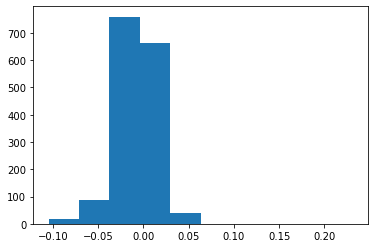

In [26]:
#Choosing feature '75' for univariate analysis
uv_analys_df = signals_df_cp['75']

#use bar histogram to split the data by group of 10 ranges 
plt.hist(uv_analys_df, bins=10)


<AxesSubplot:xlabel='75', ylabel='Density'>

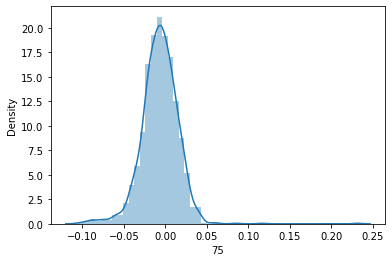

In [27]:
# Use the distplot to find the distribution
sns.distplot( uv_analys_df )

<AxesSubplot:xlabel='75', ylabel='Density'>

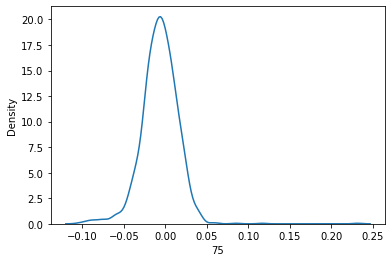

In [28]:
sns.distplot(uv_analys_df, hist=False)

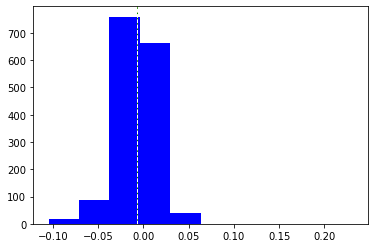

In [29]:
# Use the histogram chart and plot the median, mean and mode to identify how they are placed 
plt.hist(uv_analys_df, color='b') 
plt.axvline(uv_analys_df.mean(), color='g', linewidth=1)
plt.axvline(uv_analys_df.median(), color='y', linestyle='dashed', linewidth=1)
plt.axvline(uv_analys_df.mode()[0], color='w', linestyle='dashed', linewidth=1)

The distribution of feature '75'  follows close to agaussian / normal distribution
Most of the observations lies between -0.35  and 0.25
i.e class 3 and 4 has the most of the values
The median , mean and mode , all three are very closely placed in the distribution



***Q 3B.  Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis.***

***Ans 3B.***


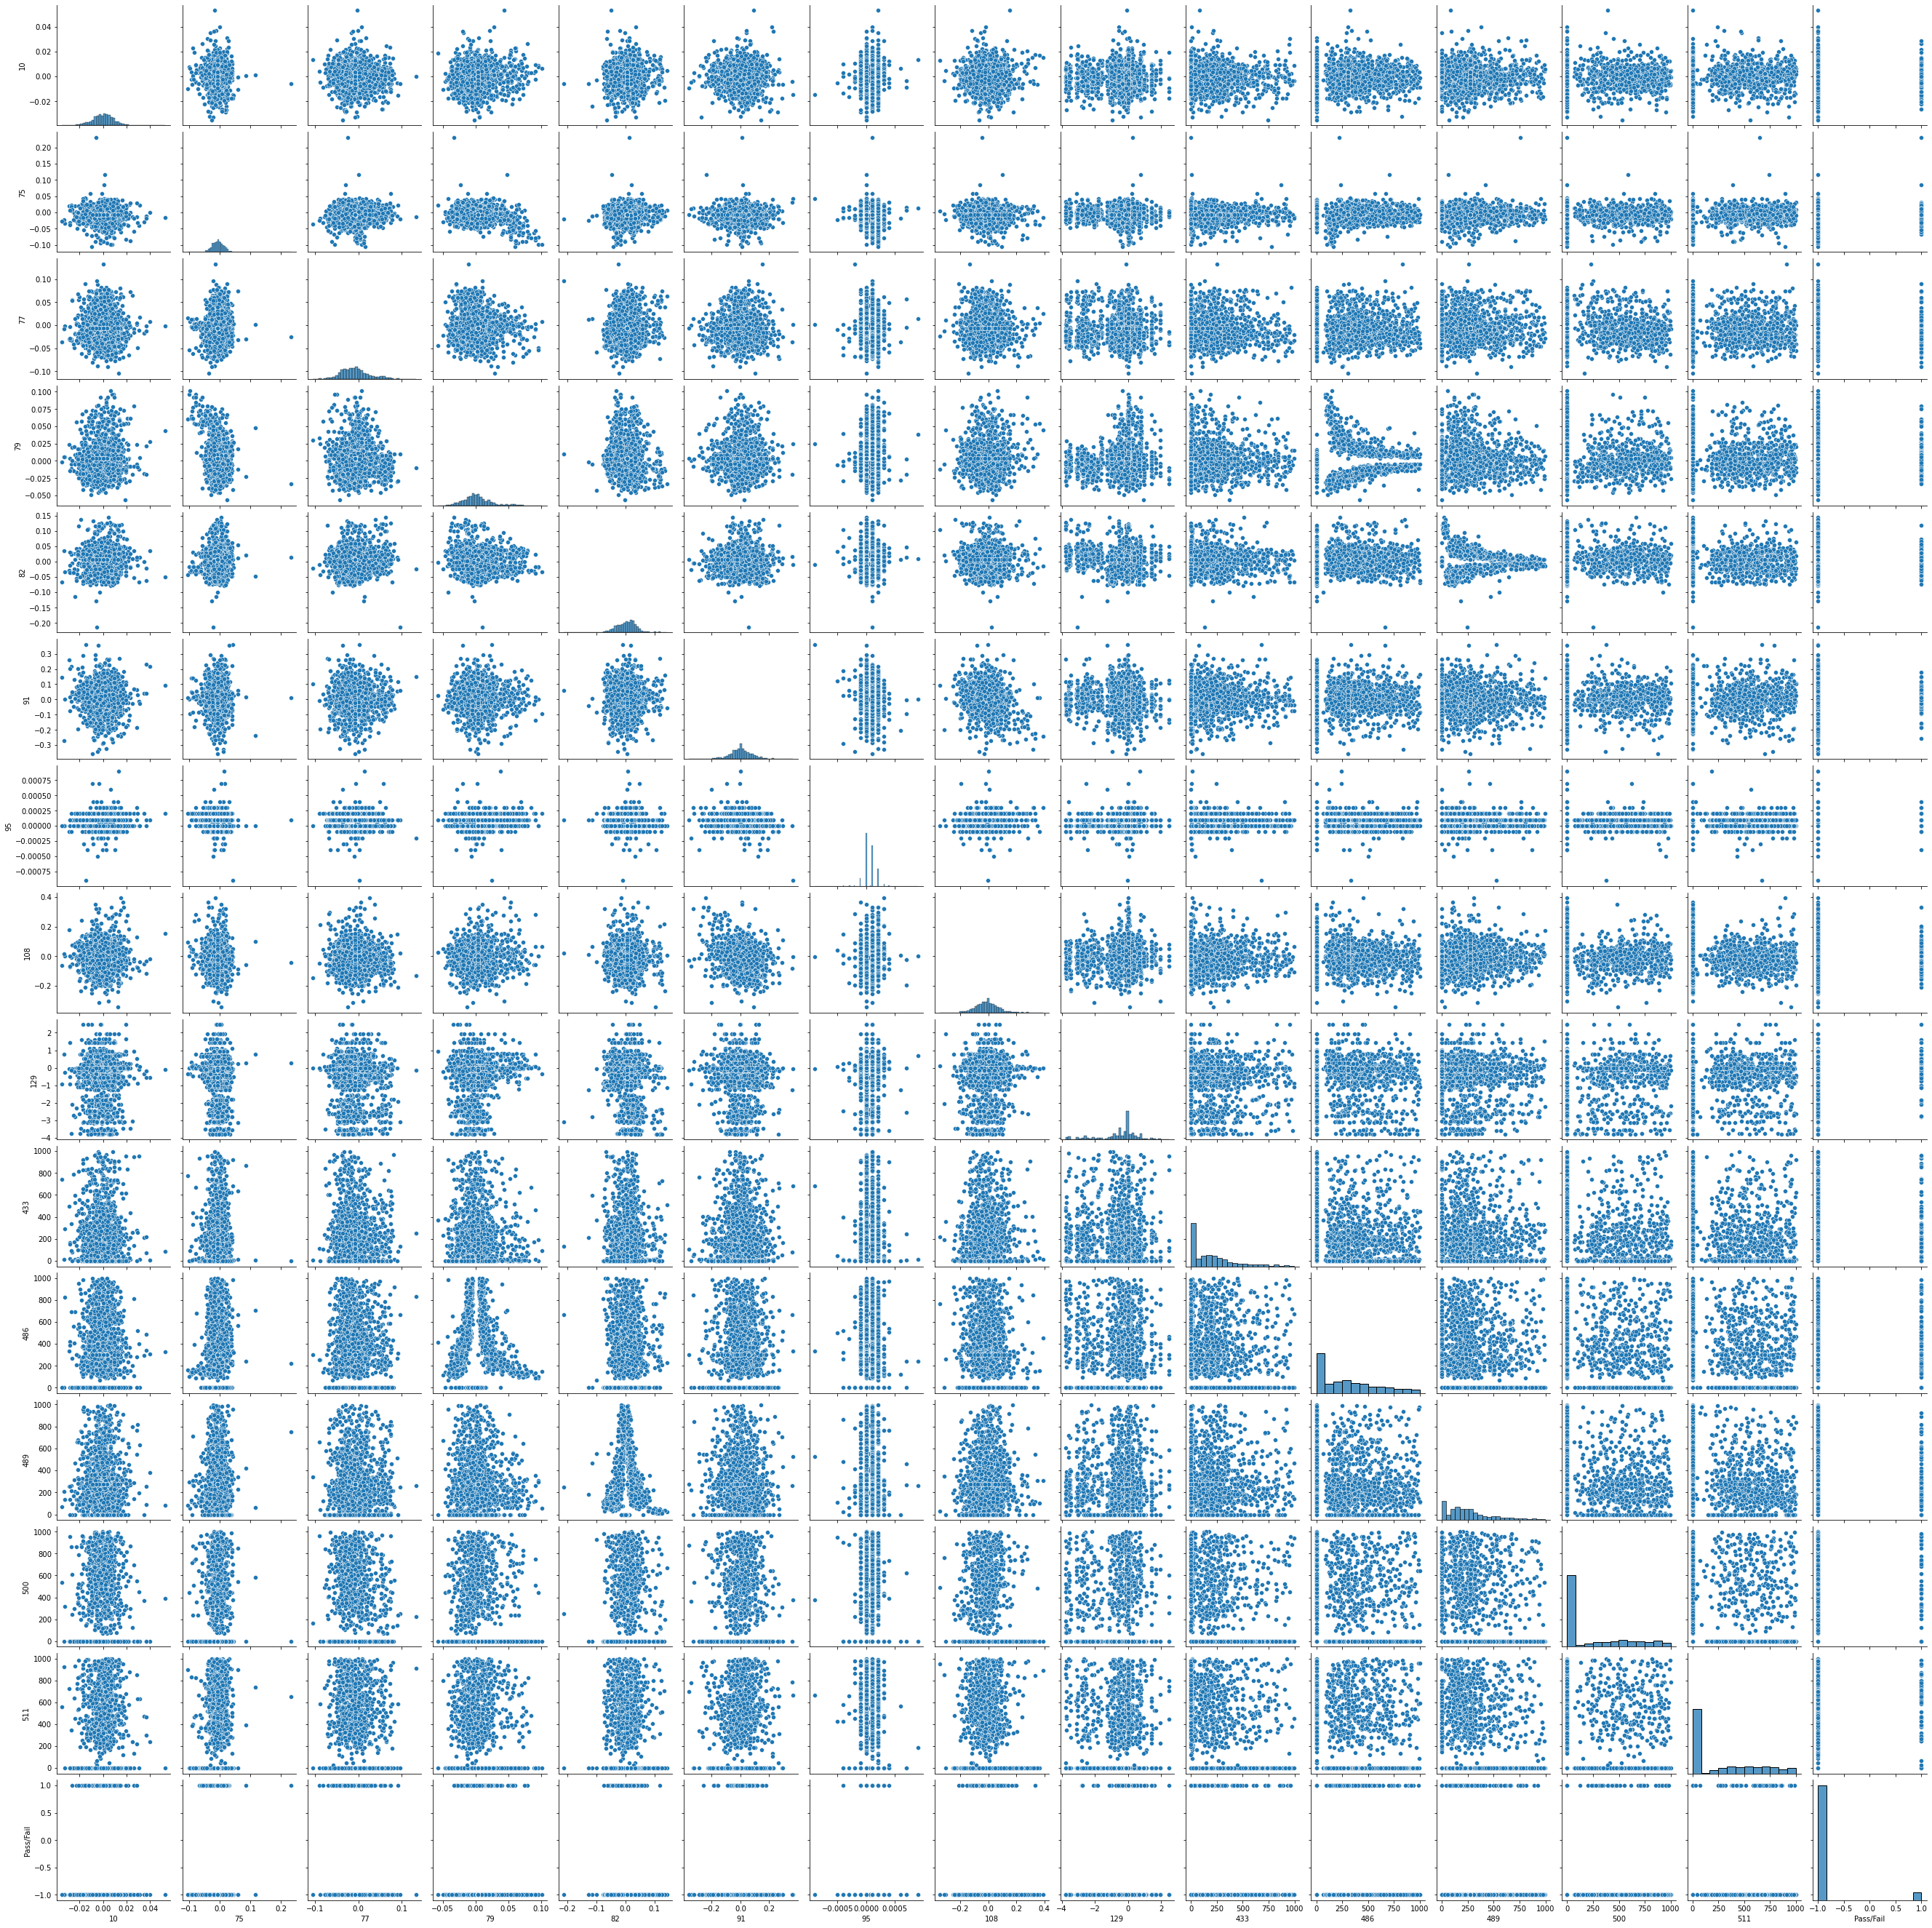

In [30]:
#Use the pairplot to find the correlation pattern
sns.pairplot(signals_df_cp)

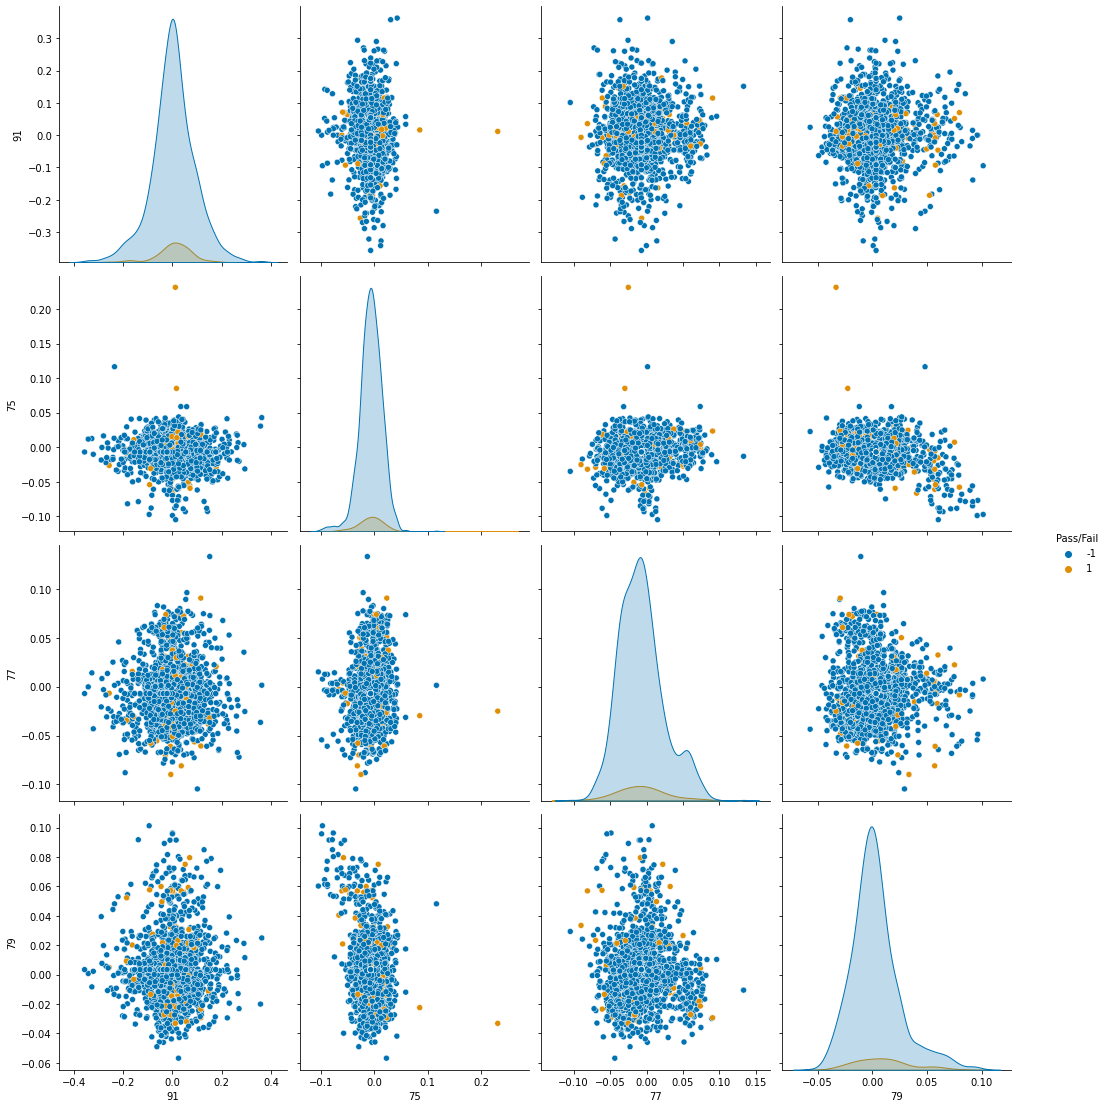

In [31]:
# Use the pairplot for selective features to find the distribution of target feature classification
plot_fig = sns.pairplot( signals_df_cp, vars = ['91', '75','77', '79'], hue='Pass/Fail', palette='colorblind' )
plot_fig.fig.set_size_inches(16,16)

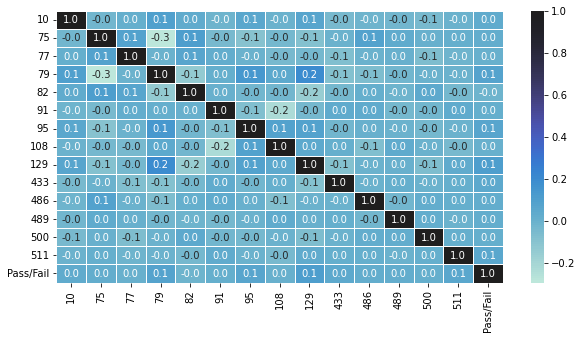

In [32]:
# Plot a heat map to find the correlation of the data
plt.figure(figsize=(10,5))
sns.heatmap(signals_df_cp.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

Very less correlation exisits between the features and target variable
Data imbalanced as there are more data available for failure scenarios


---

***4. Data pre-processing:***

***Q 4A. Segregate predictors vs target attributes.***

***Ans 4A.***

In [33]:
# Copy all the predictor variables into X dataframe. Since 'Pass/Fail' is target variable hence drop it
X_Pred = signals_df_cp.drop('Pass/Fail', axis=1)

# Copy the 'Pass/Fail' column alone into the y dataframe. This is the target variable
Y_Tgt = signals_df_cp[['Pass/Fail']]

***Q 4B. Check for target balancing and fix it if found imbalanced***

***Ans 4B***

In [34]:
# Find the unique values in the target variable and its count
Y_Tgt.value_counts()

Pass/Fail
-1           1463
 1            104
dtype: int64

Pass (value 1 considered as Pass) is less than 10% of the whole column data. 
Change alternate rows target value to 1. 
To enable easy classification change -1 to 0 

In [35]:
temp_df = signals_df_cp
row_count = 0
chg_tgt_val = True

# Iterate through the target feature and balance the data.  
# Change the alterante row negative values to positive value classification and also change the negative values to zero to aid
# models to perform classification prediction better
for index, row in signals_df_cp.iterrows():
    if (row['Pass/Fail'] == -1 ):
        if(chg_tgt_val):
            temp_df.at[index,'Pass/Fail'] = 1
            row_count = row_count + 1
            chg_tgt_val = False
        else:
            temp_df.at[index,'Pass/Fail'] = 0
            chg_tgt_val = True

        
temp_df['Pass/Fail'].value_counts()        

1    836
0    731
Name: Pass/Fail, dtype: int64

In [36]:
X = signals_df_cp.drop('Pass/Fail', axis=1)
Y = signals_df_cp[['Pass/Fail']]

*** Q 4C. C. Perform train-test split and standardise the data or vice versa if required.***

***Ans 4C***


In [37]:
# Scale the predictor features to stabdardize the values
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)  

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=2)

***Q 4D. Check if the train and test data have similar statistical characteristics when compared with original data.***

***Ans 4D.***



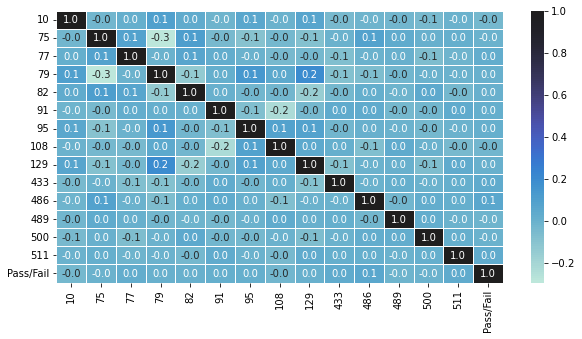

In [38]:
# Plot the complete dataset in a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(signals_df_cp.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

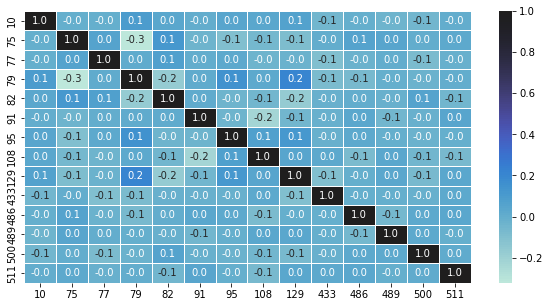

In [39]:
# Plot the training dataset in a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

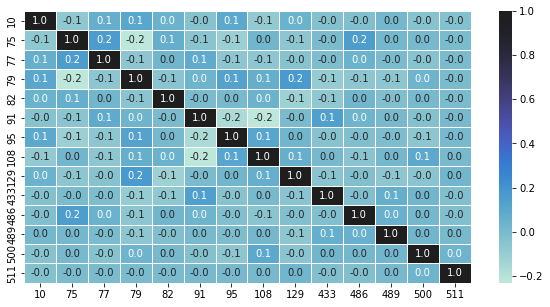

In [40]:
# Plot the complete test datsset in a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(X_test.corr(), annot=True, linewidths=.5, fmt= '.1f', center = 1 )
plt.show()

The Correlation between Train, test and orginal data is simillar


---

***5. Model training, testing and tuning:***
    
***Q 5A. Use any Supervised Learning technique to train a model.***

***Ans 5A.***  Use decision tree classifier

In [41]:
#Use the Decision Treee classifier
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [42]:
dt_model.score(X_test , y_test)

0.505307855626327

In [43]:
# Print the confusion matrix
from sklearn import metrics
y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[104 125]
 [108 134]]



***Q 5B. B. Use cross validation techniques.***

***Ans 5B.***



In [44]:
# Use the KFlod and corss value score validate the dataset
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=5, shuffle=True)

In [45]:
results = cross_val_score(dt_model,X, y, cv=kfold)
results

array([0.91082803, 0.87898089, 0.87261146, 0.89171975, 0.88535032,
       0.87898089, 0.88535032, 0.87820513, 0.88461538, 0.8974359 ])

In [46]:
np.mean(abs(results))

0.8864078066307366

In [47]:
results.std()

0.010580987727327676

In [48]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., ..., 1., 1., 1.])

In [49]:
scores.mean()

0.8768347160178686

In [50]:
scores.std()

0.3286268351850353


***Q 5C. Apply hyper-parameter tuning techniques to get the best accuracy.***

***Ans 5C***


In [51]:
# Use Grid search to find the optimum parameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

dt_model1 = DecisionTreeClassifier()
params = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
gridSrch=GridSearchCV(dt_model1, cv=2, param_grid=params, scoring='neg_mean_squared_error')

#Train the model
gridSrch.fit(X_train, y_train)

print('Best Extimator from grid search : ' , gridSrch.best_estimator_)

Best Extimator from grid search :  DecisionTreeClassifier(criterion='entropy', max_depth=3)



***Q 5D. D. Use any other technique/method which can enhance the model performance.***

***Ans 5D***


In [52]:
# Use the Random tree classifier to find and enhance the model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=10)
rfm=rf.fit(X_train, y_train)

In [53]:
y_predict = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.505307855626327
[[ 70 159]
 [ 74 168]]


In [54]:
# Use up or over sampling to increase the predictors data set
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [55]:
X_train_res.shape

(1188, 14)

In [56]:
# Train the model using over sampled training data
rfm=rf.fit(X_train_res, y_train_res)

In [57]:
y_predict = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.5031847133757962
[[ 96 133]
 [101 141]]


In [58]:
# Use the under sampling to chek the model performance 
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority')
X_rus, y_rus = rus.fit_resample(X_train, y_train)
y_rus

Pass/Fail
0             0
1             0
2             0
3             0
4             0
...         ...
999           1
1000          1
1001          1
1002          1
1003          1

[1004 rows x 1 columns]

In [59]:
# Train the model using under sample dataset
rfm=rf.fit(X_rus, y_rus)

In [60]:
y_predict = rf.predict(X_test)
print(rf.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.4585987261146497
[[100 129]
 [126 116]]



***Q 5E. Display and explain the classification report in detail.***

***Ans 5E***



In [61]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       229
           1       0.47      0.48      0.48       242

    accuracy                           0.46       471
   macro avg       0.46      0.46      0.46       471
weighted avg       0.46      0.46      0.46       471



- In the above results that there was a precision of 0.48 for identifying negatives and 0.51 for identifying positives.
- Recall - identifies 48% negatives correctly  and 51% positives correctly
- F1 Score - weighted average of the precision and recall  is again 48% and 51% 


***Q 5F. Apply the above steps for all possible models that you have learnt so far.***

***Ans 5F.***
Use Logistic Regression, KNN, Random Forest, Decision Tree and SVM models to validate the regular dataset, over sampled dataset and under sampled dataset

In [62]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
model_trn_score = logreg_model.score(X_train, y_train)
model_tst_score = logreg_model.score(X_test, y_test)
print('Logictic Regression Normal Training Score: {:.2f}%'.format(model_trn_score))
print('Logictic Regression Normal Testing Score:  {:.2f}%'.format(model_tst_score))

#train model with Over sampled data
logreg_model.fit(X_train_res, y_train_res)
model_trn_score = logreg_model.score(X_train_res, y_train_res)
model_tst_score = logreg_model.score(X_test, y_test)
print('Logictic Regression Over sampling Training Score:  {:.2f}%'.format(model_trn_score))
print('Logictic Regression Over sampling Testing Score:  {:.2f}%'.format(model_tst_score))

#train model with under sampled data
logreg_model.fit(X_rus, y_rus)
model_trn_score = logreg_model.score(X_rus, y_rus)
model_tst_score = logreg_model.score(X_test, y_test)
print('Logictic Regression Under sampling Training Score:  {:.2f}%'.format(model_trn_score))
print('Logictic Regression Under sampling Testing Score:  {:.2f}%'.format(model_tst_score))



Logictic Regression Normal Training Score: 0.56%
Logictic Regression Normal Testing Score:  0.51%
Logictic Regression Over sampling Training Score:  0.56%
Logictic Regression Over sampling Testing Score:  0.49%
Logictic Regression Under sampling Training Score:  0.55%
Logictic Regression Under sampling Testing Score:  0.48%


In [63]:
from sklearn.neighbors import KNeighborsClassifier

NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train, y_train)
NNH_trn_score = logreg_model.score(X_train, y_train)
NNH_tst_score =  NNH.score(X_test, y_test)
print('KNNeighbor Normal Training Score:  {:.2f}%'.format(NNH_trn_score))
print('KNNeighbor Normal Testing Score:  {:.2f}%'.format(NNH_tst_score))

#train model with Over sampled data
NNH.fit(X_train_res, y_train_res)
NNH_trn_score = logreg_model.score(X_train_res, y_train_res)
NNH_tst_score =  NNH.score(X_test, y_test)
print('KNNeighbor Over sampling Training Score:  {:.2f}%'.format(NNH_trn_score))
print('KNNeighbor Over sampling Testing Score:  {:.2f}%'.format(NNH_tst_score))

#train model with under sampled data
NNH.fit(X_rus, y_rus)
NNH_trn_score = logreg_model.score(X_rus, y_rus)
NNH_tst_score =  NNH.score(X_test, y_test)
print('KNNeighbor Under sampling Training Score:  {:.2f}%'.format(NNH_trn_score))
print('KNNeighbor Under sampling Testing Score:  {:.2f}%'.format(NNH_tst_score))

KNNeighbor Normal Training Score:  0.55%
KNNeighbor Normal Testing Score:  0.49%
KNNeighbor Over sampling Training Score:  0.56%
KNNeighbor Over sampling Testing Score:  0.49%
KNNeighbor Under sampling Training Score:  0.55%
KNNeighbor Under sampling Testing Score:  0.49%


In [64]:

rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=10)
rfm=rf.fit(X_train, y_train)
rfm_trn_score = rf.score(X_train, y_train)
rfm_tst_score = rf.score(X_test, y_test)
print('RandomForest Normal Training Score:  {:.2f}%'.format(rfm_trn_score))
print('RandomForest Normal Testing Score:  {:.2f}%'.format(rfm_tst_score))

#train model with Over sampled data
rfm=rf.fit(X_train_res, y_train_res)
rfm_trn_score = rf.score(X_train_res, y_train_res)
rfm_tst_score = rf.score(X_test, y_test)
print('RandomForest Over Sampling Training Score:  {:.2f}%'.format(rfm_trn_score))
print('RandomForest Over Sampling Testing Score:  {:.2f}%'.format(rfm_tst_score))

#train model with under sampled data
rfm=rf.fit(X_rus, y_rus)
rfm_trn_score = rf.score(X_rus, y_rus)
rfm_tst_score = rf.score(X_test, y_test)
print('RandomForest Under Sampling Training Score:  {:.2f}%'.format(rfm_trn_score))
print('RandomForest Under Sampling Testing Score:  {:.2f}%'.format(rfm_tst_score))


RandomForest Normal Training Score:  1.00%
RandomForest Normal Testing Score:  0.51%
RandomForest Over Sampling Training Score:  1.00%
RandomForest Over Sampling Testing Score:  0.50%
RandomForest Under Sampling Training Score:  1.00%
RandomForest Under Sampling Testing Score:  0.46%


In [65]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)
dt_trn_score = dt_model.score(X_train, y_train)
dt_tst_score = dt_model.score(X_test , y_test)
print('Decision Tree Classifier Normal Training Score:  {:.2f}%'.format(dt_trn_score))
print('Decision Tree Classifier Normal Testing Score:  {:.2f}%'.format(dt_tst_score))

#train model with Over sampled data
dt_model.fit(X_train_res, y_train_res)
dt_trn_score = dt_model.score(X_train_res, y_train_res)
dt_tst_score = dt_model.score(X_test , y_test)
print('Decision Tree Classifier Over Sampling Training Score:  {:.2f}%'.format(dt_trn_score))
print('Decision Tree Classifier Over Sampling Testing Score:  {:.2f}%'.format(dt_tst_score))

#train model with under sampled data
dt_model.fit(X_rus, y_rus)
dt_trn_score = dt_model.score(X_rus, y_rus)
dt_tst_score = dt_model.score(X_test , y_test)
print('Decision Tree Classifier Under Sampling Training Score:  {:.2f}%'.format(dt_trn_score))
print('Decision Tree Classifier Under Sampling Testing Score:  {:.2f}%'.format(dt_tst_score))

Decision Tree Classifier Normal Training Score:  1.00%
Decision Tree Classifier Normal Testing Score:  0.53%
Decision Tree Classifier Over Sampling Training Score:  1.00%
Decision Tree Classifier Over Sampling Testing Score:  0.50%
Decision Tree Classifier Under Sampling Training Score:  1.00%
Decision Tree Classifier Under Sampling Testing Score:  0.46%


In [66]:
from sklearn.svm import SVC
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)
svc_trn_score = svc_model.score(X_train, y_train)
svc_tst_score = svc_model.score(X_test, y_test)
print('Support Vector Machine Normal Training Score:  {:.2f}%'.format(svc_trn_score))
print('Support Vector Machine Normal Testing Score:  {:.2f}%'.format(svc_tst_score))

#train model with Over sampled data
svc_model.fit(X_train_res, y_train_res)
svc_trn_score = svc_model.score(X_train_res, y_train_res)
svc_tst_score = svc_model.score(X_test, y_test)
print('Support Vector Machine Over sampling Training Score:  {:.2f}%'.format(svc_trn_score))
print('Support Vector Machine Over sampling Testing Score:  {:.2f}%'.format(svc_tst_score))

#train model with under sampled data
svc_model.fit(X_rus, y_rus)
svc_trn_score = svc_model.score(X_rus, y_rus)
svc_tst_score = svc_model.score(X_test, y_test)
print('Support Vector Machine under sampling Training Score:  {:.2f}%'.format(svc_trn_score))
print('Support Vector Machine under sampling Testing Score:  {:.2f}%'.format(svc_tst_score))

Support Vector Machine Normal Training Score:  0.54%
Support Vector Machine Normal Testing Score:  0.51%
Support Vector Machine Over sampling Training Score:  0.57%
Support Vector Machine Over sampling Testing Score:  0.49%
Support Vector Machine under sampling Training Score:  0.55%
Support Vector Machine under sampling Testing Score:  0.49%



---

***6. Post Training and Conclusion:***
    
***Q 6A.  Display and compare all the models designed with their train and test accuracies.***

***Ans 6A.***


***Q 6B. . Select the final best trained model along with your detailed comments for selecting this model***

***Ans 6B.***

- Decision Tree Classifier model provides a better test accuracy compared to other models.
- In all other models the undersampling precision score is comparitively lesser than over sampling or regular sample precision score
But Decision Tree Classifier model has a better performing Under sample score.


***Q 6C. C. Pickle the selected model for future use***

***Ans 6C.***

In [67]:
import pickle
# declare the file name ,  no path or folder added hence will be stored to local default folder
DTC_pickle_filnm = 'DTC_pickle.pyl'

# Open the stream to write
OutputFile = open( DTC_pickle_filnm, 'wb')

#Write to the file
pickle.dump(dt_model , OutputFile )

# close the stream to save the file for future use.
OutputFile.close()


***Q 6D. Write your conclusion on the results.***

***Ans 6D.***


- Feature selection depends on the fucntional knowledge on the data and the training data quality.
- some of the dimension reduction process using Ridge and Lasso provides better option over manual scrutiny
- Need more due diligence when removing records or rows when one of the columns having a null value as it might impact the precision score
- Over sampling did not improve the precision score as expected for this given dimesionally reduced dataset
- Precision score has improved between 7 to 8 points after reducing the features and balancing the data.